**Determinazione della distribuzione di probabilità di parametri sperimentali**

*griglia di sensori*


In [2]:
import numpy as np
from scipy.stats import poisson
from numpy import random as rnd
import matplotlib.pyplot as plt

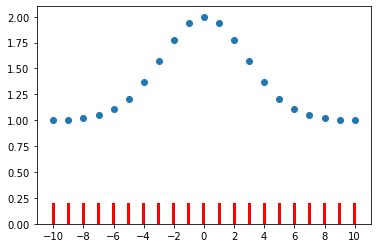

In [3]:
sp=np.arange(-10,11)
A=1.0
B=1.0
def modello(a,b):
    return a+b*np.exp(-sp*sp/16)
modello_base=modello(A,B)
plt.plot(sp, modello_base,'o')
plt.bar(sp,0.2, width=0.2, color='r')
_=plt.xticks(sp[::2])

il modello del segnale è quello di eventi casuali indipendenti con 
$$\frac{\lambda}{s}=A+B e^{-\frac {x^2} {16}}$$



$$ P({\bf n}| A,B) = \prod_i P(n_i| A,B) = 
\prod_i P_{\text{poisson}}(n_i|\lambda_i(A,B))$$

$$\log(P({\bf n}| A,B)=\sum_i \log(P_{\text{poisson}}(n_i| A+B e^{-\frac{i^2}{16}}) $$

array([34, 32, 56, 52, 45, 51, 61, 53, 71, 84, 83, 71, 78, 60, 53, 51, 47,
       25, 43, 27, 34])

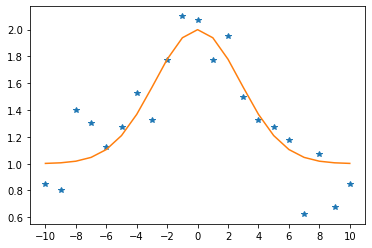

In [17]:
T=40
#dati=[rnd.poisson(l*T) for l in modello_base]
dati=rnd.poisson(modello_base*T)
lambda_sp=dati/T
plt.plot(sp, lambda_sp, '*')
plt.plot(sp, modello_base)
_=plt.xticks(sp[::2])
dati

$$ P(A,B|{\bf n})P({\bf n})= P({\bf n}|A,B)P(A,B)$$

In [18]:
def pcond(At, Bt, n):
    m=modello(At, Bt)
    return sum(np.log(poisson.pmf(n, m*T)))

pcond(1,1,dati)

-74.90544595441199

In [19]:
Av=np.arange(0.8, 1.4, 0.02)
Bv=np.arange(0.6, 1.4, 0.02)

lv=np.array([
    [pcond(av,bv,dati) for av in Av]
    for bv in Bv])

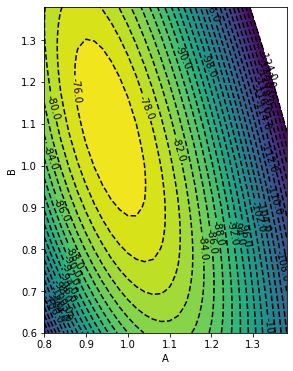

In [26]:
minlv=np.round(np.min(lv))
maxlv=np.round(np.max(lv))
livelli=np.arange(maxlv-50, maxlv+1, 2.0)
fig,ax=plt.subplots(figsize=(6,6))
cs=ax.contourf(Av, Bv,lv, livelli)
cs=ax.contour(Av, Bv, lv, livelli, colors='k')
ax.clabel(cs, inline_spacing=2, fontsize=10, colors='k', fmt='%1.1f')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_aspect('equal')

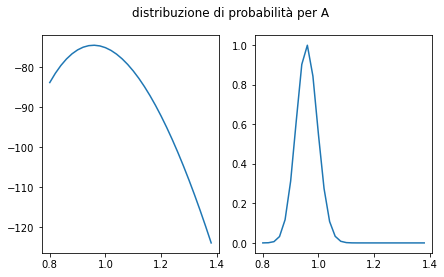

In [21]:
maxlv=np.max(lv)
img,axs=plt.subplots(ncols=2, figsize=(7,4))
pmax = np.unravel_index(lv.argmax(), lv.shape)
lvo=lv[pmax[0]]
axs[0].plot(Av, lvo)
axs[1].plot(Av,np.exp(lvo-maxlv))
_=img.suptitle('distribuzione di probabilità per A')

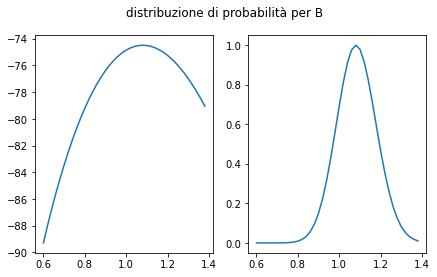

In [22]:
img,axs=plt.subplots(ncols=2, figsize=(7,4))
lvv=lv[:,pmax[1]]
axs[0].plot(Bv, lvv)
axs[1].plot(Bv,np.exp(lvv-maxlv))
_=img.suptitle('distribuzione di probabilità per B')

In [16]:
pmax

(27, 8)

provate a fare lo stesso esercizio con A e B fissati ma centro e larghezza della distribuzione ignoti